In [1]:
import numpy as np

from cea import cea_gen
from operators import mutate_gaussian
from operators import nhood_linear
from operators import recomb_singlepoint
from operators import sample_uniform
from operators import select_linear

from functions import rastrigin

from functools import partial

def evaluate(population, f):
    return 1.0 / (np.apply_along_axis(f, 2, population) + 1.0)

In [2]:
DIMS = (16, 16)
NF   = 2

EVAL   = partial(evaluate, f=rastrigin)
NHOOD  = partial(nhood_linear, n=5)
SELECT = select_linear
RECOMB = recomb_singlepoint
MUTATE = partial(mutate_gaussian, sigma=0.01)

pop = sample_uniform(-5.12, 5.12, DIMS + (NF,))
fit = EVAL(pop)

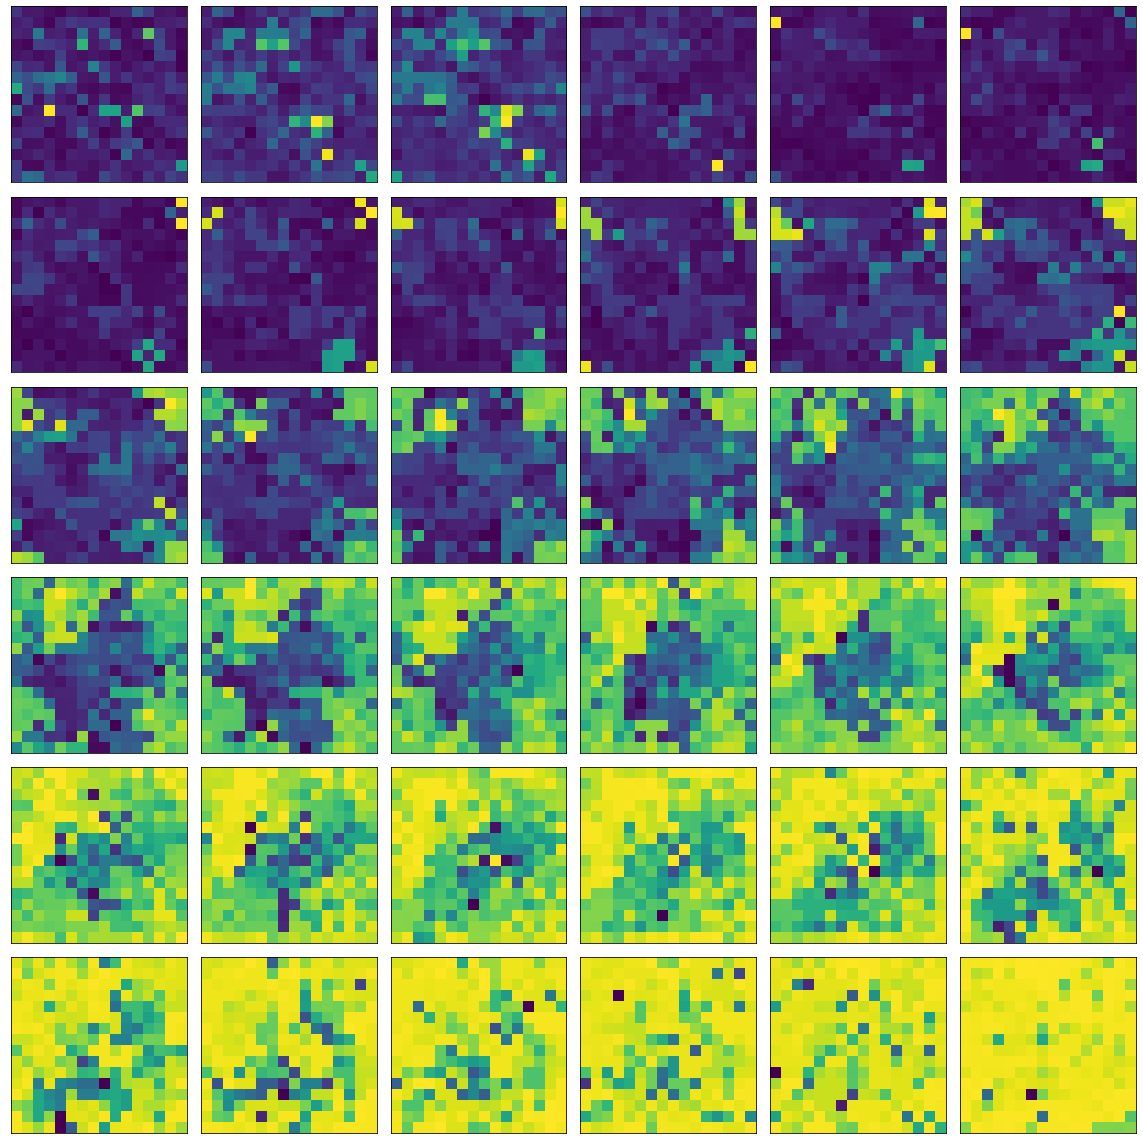

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(6, 6, figsize=(16, 16), subplot_kw={"xticks": (), "yticks": ()})

for _, ax in zip(range(6 * 6), axes.ravel()):
    pop, fit = cea_gen(pop, fit, DIMS, 
        f_evaluate=EVAL,
        f_nhood   =NHOOD,
        f_select  =SELECT,
        f_recomb  =RECOMB,
        f_mutate  =MUTATE)
    ax.imshow(fit)

fig.tight_layout()